# Case Study: Bellabeat Data Analysis

## 1. Ask
**Business Task:** Analyze smart device usage data from non-Bellabeat consumers to discover trends that can guide Bellabeat's marketing strategy.

**The Goal:** To answer: *"How can these trends help influence Bellabeat marketing strategy?"*

---

## 2. Prepare
**Dataset Used:** Fitbit Fitness Tracker Data (CC0: Public Domain, via Mobius on Kaggle) <br>
**Scope:** 33 users, April–May 2016
**Files Used:**
* dailyActivity_merged.csv
* sleepDay_merged.csv

**Tools:** Python (Pandas, Matplotlib, Seaborn)
**Limitations:** Small sample size, limited demographic data, short time frame.

In [6]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import warnings
warnings.filterwarnings('ignore')

# AUTHENTICATE
try:
    api = KaggleApi()
    api.authenticate()
    print("Authenticated successfully!")
except Exception as e:
    print(f"Error: {e}")

# DOWNLOAD BELLABEAT DATA
dataset_slug = "arashnic/fitbit"
download_path = "bellabeat_data"

print(f"Downloading {dataset_slug}...")
api.dataset_download_files(dataset_slug, path=download_path, unzip=True)

print("Download Complete!")

Authenticated successfully!
Dataset URL: https://www.kaggle.com/datasets/arashnic/fitbit
Download Complete!


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plotting
sns.set_style("whitegrid")

# Define a custom color palette (Bellabeat Theme)
colors = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1"]
sns.set_palette(sns.color_palette(colors))

# Update default fonts and sizes for readability
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'figure.figsize': (10, 6),
    'axes.titleweight': 'bold'
})

In [8]:
import pandas as pd

# Load the main dail activity file
df = pd.read_csv("bellabeat_data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


---

## 3. Process 
**cleaning and wrangling the data:**

1. Checked for duplicates and missing values.
2. Filter out zero step day.
3. Converted date columns to datetime format.
4. Created new features (`DayofWeek`).

> **Data Integrity Check:**
> * **Expectation vs. Reality:** The documentation claimed **30 users**, but my validation discovered **33 unique IDs**.
> * **Decision:** I will keep all 33 users to maximize the sample size, but I've noted this discrepancy as a limitation to be aware of.

> * **The "Zero" Problem:** I identified **77 days** where users logged 0 steps.
> * **Action:** These rows were removed because they likely represent days the device wasn't worn, which would skew the daily activity averages downward incorrectly.

In [9]:
# Let's check how many unique users in dataset
print(f"Total Unique Users: {df['Id'].nunique()}")

Total Unique Users: 33


>The Dataset description said there are 30 users, but with this revealed that there are 33 users. 

In [10]:
# Check data types for each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [11]:
# Convert 'ActivityDate' to datetime format
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Verify
print(f"'ActivityDate' data type: {df['ActivityDate'].dtype}")

# Create a new column for 'Day of Week' (this column useful for analyzing habits)
df['DayofWeek'] = df['ActivityDate'].dt.day_name()

# Check
print(df[['ActivityDate', 'DayofWeek']])

'ActivityDate' data type: datetime64[ns]
    ActivityDate  DayofWeek
0     2016-04-12    Tuesday
1     2016-04-13  Wednesday
2     2016-04-14   Thursday
3     2016-04-15     Friday
4     2016-04-16   Saturday
..           ...        ...
935   2016-05-08     Sunday
936   2016-05-09     Monday
937   2016-05-10    Tuesday
938   2016-05-11  Wednesday
939   2016-05-12   Thursday

[940 rows x 2 columns]


In [12]:
# Check for duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")

# Check for missing values
print("Missing values for each columns:")
print(df.isna().sum())

# Let's also check if there are days with zero steps
zerosteps = df[df['TotalSteps'] == 0].shape[0]
print("-" * 30)
print(f"Rows with 0 steps: {zerosteps}")

Number of duplicates: 0
Missing values for each columns:
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
DayofWeek                   0
dtype: int64
------------------------------
Rows with 0 steps: 77


> Seems like there are **77 rows** with **0 steps**, it's probably because they didn't wear the device that day or the battery died. If i keep them, it will drag the average steps down, so i decided to filter them out to get an accurate picture of **active usage**.

In [13]:
# Filter out rows with 0 steps
df_active = df[df['TotalSteps'] > 0].copy()

# Check how many rows left
print(f"Original rows: {df.shape[0]}")
print(f"Cleaned rows: {df_active.shape[0]}")
print(f"Removed rows: {df.shape[0] - df_active.shape[0]}")

Original rows: 940
Cleaned rows: 863
Removed rows: 77


----

## 4. Analyze & Share
Now that the data is clean (duplicates removed, dates formatted), we will look for 3 key patterns:
1.  **Usage Habits:** When are users most active?
2.  **Intensity:** Do steps equal calories, or does intensity matter?
3.  **The "Hidden" Cost:** How does sedentary time affect sleep?
<br>
<br>

> **Key Insight:**
> * **The Trend:** Users are most active on **Tuesdays** and **Saturdays**, but activity drops significantly on **Sundays**.
> * **The Gap:** The average user takes **~8,319 steps**, falling just short of the common 10,000-step health goal. This "gap" is a marketing opportunity.

In [24]:
# Summary Stats
print("Summary Status:")
df_active.describe()

Summary Status:


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,8.630000e+02,863,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,4.857542e+09,2016-04-26 02:16:49.501738240,8319.392816,5.979513,5.963882,0.117822,1.636756,0.618181,3.638899,0.001750,23.015064,14.775203,210.016222,955.753187,2361.295481
min,1.503960e+09,2016-04-12 00:00:00,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000
25%,2.320127e+09,2016-04-18 00:00:00,4923.000000,3.370000,3.370000,0.000000,0.000000,0.000000,2.345000,0.000000,0.000000,0.000000,146.500000,721.500000,1855.500000
50%,4.445115e+09,2016-04-26 00:00:00,8053.000000,5.590000,5.590000,0.000000,0.410000,0.310000,3.580000,0.000000,7.000000,8.000000,208.000000,1021.000000,2220.000000
75%,6.962181e+09,2016-05-03 00:00:00,11092.500000,7.900000,7.880000,0.000000,2.275000,0.865000,4.895000,0.000000,35.000000,21.000000,272.000000,1189.000000,2832.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,2.418405e+09,NaN,4744.967224,3.721044,3.703191,0.646111,2.735289,0.905049,1.857503,0.007651,33.646118,20.427405,96.781296,280.293359,702.711148


>From summary above, the average steps are **8319** while the general health recommendation is often **10,000** steps/day. Let's analyze deeper to see day per day activity.

            TotalSteps     Calories
DayofWeek                          
Monday     8488.218182  2385.618182
Tuesday    8949.282609  2440.978261
Wednesday  8157.597122  2339.431655
Thursday   8185.398496  2274.436090
Friday     7820.641667  2351.608333
Saturday   8946.628319  2428.752212
Sunday     7626.554545  2310.927273
------------------------------------------------------------


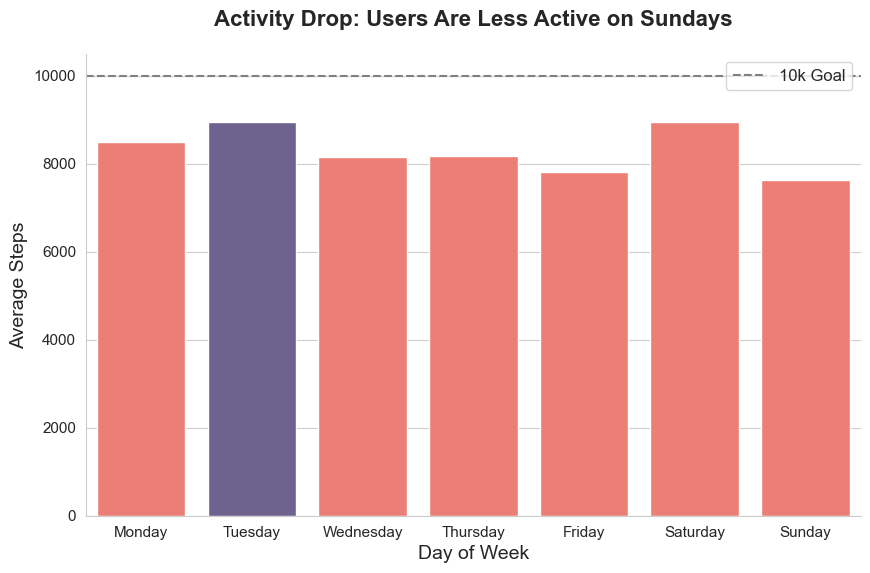

In [25]:
# Grouping by DayofWeek, ordered from monday-sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_stats = df_active.groupby('DayofWeek')[['TotalSteps', 'Calories']].mean().reindex(day_order)

print(daily_stats)
print('-'*60)

# Create a color list where the max value is highlighted
values = daily_stats['TotalSteps']
clrs = ['#FF6F61' if (x < values.max()) else '#6B5B95' for x in values]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=daily_stats.index, y=values, palette=clrs, hue=daily_stats.index)

plt.title('Activity Drop: Users Are Less Active on Sundays', pad=20)
plt.xlabel('Day of Week')
plt.ylabel('Average Steps')
plt.axhline(y=10000, color='gray', linestyle='--', label='10k Goal')
plt.legend()
sns.despine()

plt.savefig('activity_by_day.png', dpi=300, bbox_inches='tight')
plt.show()

> From the chart above, i can assume:
>* **Tuesday Peak**: Likely people hitting the gym or walking during their work routine
>* **Saturday Peak**: Active leisure on weekend
>* **Sunday Slump**: The "rest day"

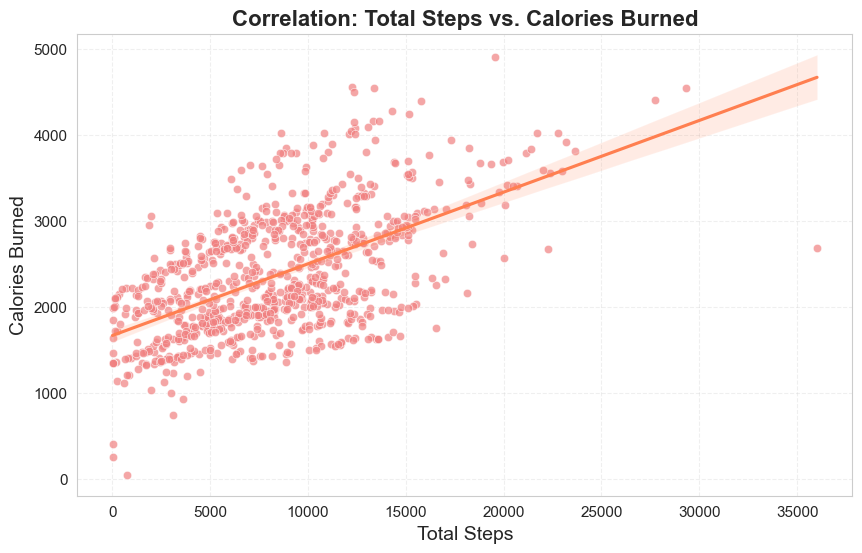

Correlation Coefficient: 0.56


In [16]:
import seaborn as sns

# Find out correlation between 'TotalSteps' vs. 'Calories'
sns.scatterplot(data=df_active, x='TotalSteps', y='Calories', 
                alpha=0.7, color='lightcoral')

# Trendline
sns.regplot(data=df_active, x='TotalSteps', y='Calories',
            scatter=False, color='coral')

# title and labels
plt.title("Correlation: Total Steps vs. Calories Burned")
plt.xlabel("Total Steps")
plt.ylabel("Calories Burned")
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

# calculate correlation coefficient
correlation = df_active['TotalSteps'].corr(df_active['Calories'])
print(f"Correlation Coefficient: {correlation:.2f}")

> Solid moderate positive correlation (0.56). That means **more steps more calories burned**.

------------------------------------------------------------
Average Minutes Summary:
VeryActiveMinutes        23.015064
FairlyActiveMinutes      14.775203
LightlyActiveMinutes    210.016222
SedentaryMinutes        955.753187
dtype: float64
------------------------------------------------------------


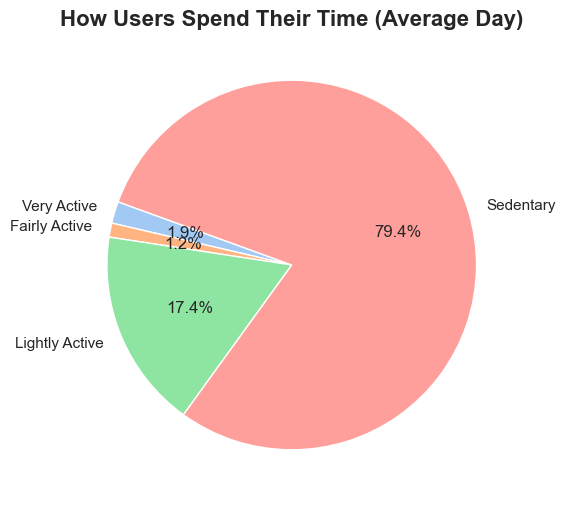

In [17]:
# calculate the average minutes for each activity category
minutes_col = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
avg_minutes = df_active[minutes_col].mean()

# Average minutes summary
print('-'*60)
print("Average Minutes Summary:")
print(avg_minutes)
print('-'*60)

# Pie chart
plt.pie(avg_minutes,
        labels=['Very Active', 'Fairly Active', 'Lightly Active', 'Sedentary'],
        autopct='%1.1f%%',
        startangle=160,
        colors=sns.color_palette('pastel'))
plt.title("How Users Spend Their Time (Average Day)")
plt.show()

>Average **Sedentary** is surprisingly high, *~955 minutes* that means *~16 hours* a day sedentary (sitting/office/commute/etc) and they have **~8 hours** left for everything else (sleep + excersise). This insight suggest users likely trading sleep for sedentary time (revenge bedtime procrastination)?. Let's analyze `sleepday` data to find out more about this.

In [18]:
# Load the sleep dataset
sleep_file = "bellabeat_data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv"
df_sleep = pd.read_csv(sleep_file)

# Check each columns dtypes
print(df_sleep.dtypes)

# Check the data first
df_sleep.head()

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [19]:
# Convert `SleepDay` to datetime
df_sleep['SleepDay'] = pd.to_datetime(df_sleep['SleepDay'])

# Check for duplicates
print(f"Number of duplicates: {df_sleep.duplicated().sum()}")

# Check for missing Values
print(f"Number of missing values: \n{df_sleep.isna().sum()}")

Number of duplicates: 3
Number of missing values: 
Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64


In [20]:
# drop duplicates
df_sleep.drop_duplicates(inplace=True)

# see the stats
df_sleep[['TotalMinutesAsleep', 'TotalTimeInBed']].describe()

,TotalMinutesAsleep,TotalTimeInBed
count,410.000000,410.000000
mean,419.173171,458.482927
std,118.635918,127.455140
min,58.000000,61.000000
25%,361.000000,403.750000
50%,432.500000,463.000000
75%,490.000000,526.000000
max,796.000000,961.000000


>Average sleep time in minutes *~419* = less than *7 hours*. Meanwhile, the general sleep recommendation is 7-9 hours for most adults.

In [21]:
# --- Merge Dataframe ---

# rename 'SleepDay' to 'ActivityDate'
df_sleep.rename(columns={'SleepDay': 'ActivityDate'}, inplace=True)

# Merge daily activity and sleep dataframe
df_merged = df_active.merge(df_sleep, on=['Id','ActivityDate'], how='inner')

print(f"Merged Dataset Shape: {df_merged.shape}")
df_merged.head()

Merged Dataset Shape: (410, 19)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayofWeek,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,Sunday,1,700,712


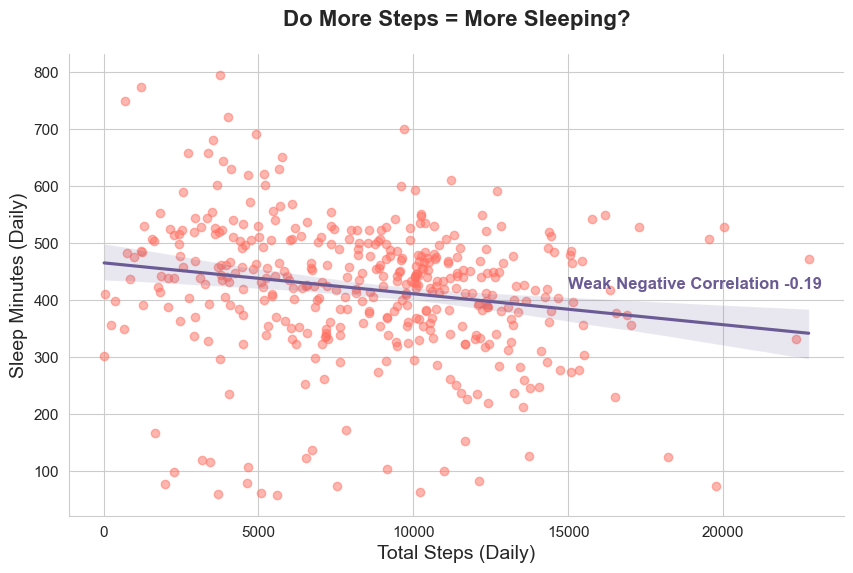

In [22]:
# Check correlation between Total steps vs. Sleep
plt.figure(figsize=(10, 6))
sns.regplot(data=df_merged, x='TotalSteps', y='TotalMinutesAsleep', 
            scatter_kws={'alpha':0.5, 'color':'#FF6F61'}, line_kws={'color':'#6B5B95'})

plt.title('Do More Steps = More Sleeping?', pad=20)
plt.xlabel('Total Steps (Daily)')
plt.ylabel('Sleep Minutes (Daily)')

# calculate corr coeficient
correlation = df_merged['TotalSteps'].corr(df_merged['TotalMinutesAsleep'])

# Add an annotation to "teach" the viewer
plt.text(x=15000, y=420, s=f'Weak Negative Correlation {correlation:.2f}', 
         fontsize=12, color='#6B5B95', weight='bold')

sns.despine()
plt.show()


> **-0.19 correlation** essentially means **"Walking more does NOT guarantee better sleep."** In fact, on days when users walk a ton, they might actually sleep slightly less (maybe because they are busy, over-scheduled, or staying up late to finish tasks).

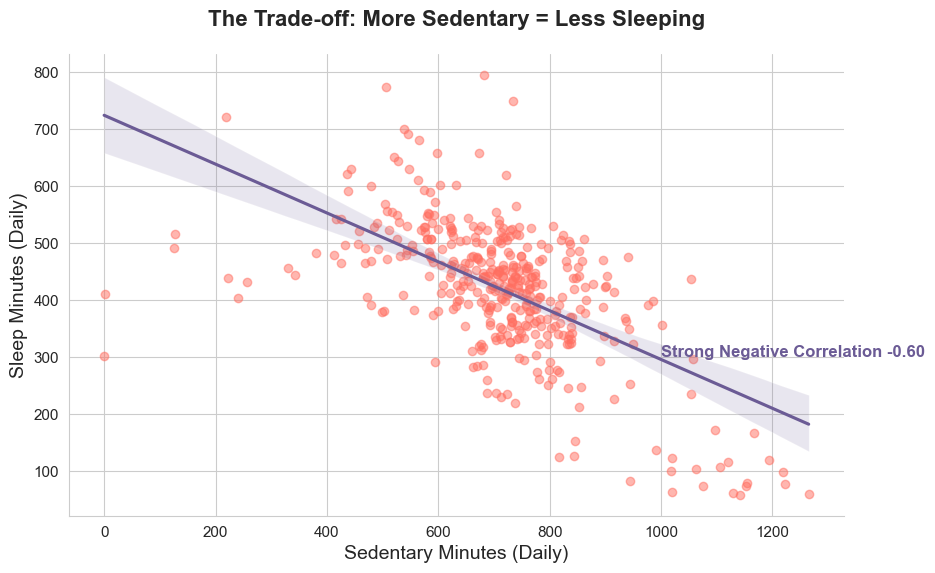

In [26]:
# Check correlation between Sedentary vs. Sleep
plt.figure(figsize=(10, 6))
sns.regplot(data=df_merged, x='SedentaryMinutes', y='TotalMinutesAsleep', 
            scatter_kws={'alpha':0.5, 'color':'#FF6F61'}, line_kws={'color':'#6B5B95'})

plt.title('The Trade-off: More Sedentary = Less Sleeping', pad=20)
plt.xlabel('Sedentary Minutes (Daily)')
plt.ylabel('Sleep Minutes (Daily)')

# Calculate correlation coef
correlation = df_merged['SedentaryMinutes'].corr(df_merged['TotalMinutesAsleep'])

# Add an annotation to "teach" the viewer
plt.text(x=1000, y=300, s=f'Strong Negative Correlation {correlation:.2f}', 
         fontsize=12, color='#6B5B95', weight='bold')

sns.despine()

plt.savefig('sedentary_vs_sleep.png', dpi=300, bbox_inches='tight')
plt.show()

> **Key Insight: The "Sedentary Cycle"**
> * **The Stats:** Users spend approx. **16 hours a day** sedentary.
> * **The Consequence:** There is a **strong negative correlation (-0.60)** between sedentary minutes and sleep.
> * **Conclusion:** Users aren't necessarily "lazy"—they are active, but their high sedentary time (likely screen time or office work) is eating directly into their sleep window.

---

## 5. Act (Recommendations)

Based on the **strong negative correlation (-0.60)** between Sedentary Time and Sleep, here are my top 3 recommendations for the Bellabeat Marketing Strategy:

### 1. The "Wind-Down" Feature 
* **Insight:** Users who sit more than 10 hours a day sleep significantly less.
* **Strategy:** Update the Bellabeat App to send **"Movement Breaks"** specifically in the evening (7 PM - 9 PM) to break the sedentary loop before bed.

### 2. "Weekend Warrior" Campaigns
* **Insight:** Activity peaks on Tuesdays and Saturdays but drops on Sundays.
* **Strategy:** Send Sunday morning notifications encouraging "Active Recovery" (yoga, light walks) to maintain consistency.

### 3. Educate on "Hidden Sedentary" Time
* **Insight:** Users spend ~16 hours sedentary, often without realizing it.
* **Strategy:** Market the Bellabeat Leaf/Time not just as a fitness tracker, but as a **"Wellness Alarm"** that tracks inactivity, not just activity.

> **Key Insight: The Strategy Pivot**
> * **Old Strategy:** Focus on "Get Active" (Step Counts).
> * **New Strategy:** Focus on **"Holistic Balance"** (Rest & Recovery).
> * **Why:** Our users are already walking ~8k steps. The bigger problem and the unique value proposition for Bellabeat is helping them manage the **16 hours of sedentary time** that is hurting their sleep.